In [144]:
import os
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *
from math import radians, cos, sin, asin, sqrt
from vision.misc.help_func import go_up_n_levels

os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from vision.tools.jupyter_notebooks import notebook_analysis_help_funcs 

In [145]:
import importlib
importlib.reload(notebook_analysis_help_funcs)
from vision.tools.jupyter_notebooks.notebook_analysis_help_funcs import *

In [146]:
master_folder = "/media/fruitspec-lab/cam175/customers_new/LIMONE24"
# master_folder = "/media/fruitspec-lab/cam175/LIMONE"
row_lengths = run_on_folder(master_folder)
row_lengths

{'LIMONE24_LOT10XX4_R10_S1(061023)': 187.30971288873906,
 'LIMONE24_LOT10XX4_R11_S1(061023)': 186.1926124614696,
 'LIMONE24_LOT10XX4_R8_S1(061023)': 185.99033951283712,
 'LIMONE24_LOT10XX4_R9_S1(061023)': 183.34195420754835,
 'LIMONE24_LOT1XXX0_R4_S1(051023)': 169.64569283721266,
 'LIMONE24_LOT1XXX0_R5_S1(051023)': 170.50604418413118,
 'LIMONE24_LOT1XXX0_R7_S1(051023)': 168.79490882655307,
 'LIMONE24_LOT1XXX0_R8_S1(051023)': 170.07964482493387,
 'LIMONE24_LOT3XXX1_R2_S1(041023)': 192.91094187079634,
 'LIMONE24_LOT3XXX1_R3_S1(041023)': 191.52629219132533,
 'LIMONE24_LOT3XXX1_R4_S1(041023)': 188.124426913044,
 'LIMONE24_LOT3XXX1_R5_S1(041023)': 191.52678587790862,
 'LIMONE24_LOT5XXX1_R6_S1(031023)': 184.76396152467046,
 'LIMONE24_LOT5XXX1_R7_S1(031023)': 187.5479302044622,
 'LIMONE24_LOT6XXX0_R5_S1(021023)': 195.53524375039495,
 'LIMONE24_LOT6XXX0_R7_S1(021023)': 192.0598377438413,
 'LIMONE24_LOT6XXX0_R8_S1(021023)': 190.5042004154082,
 'LIMONE24_LOT6XXX0_R9_S1(021023)': 192.117781684191

In [147]:
n_tracks = run_on_folder_tracks(master_folder)
n_tracks

{'LIMONE24_LOT10XX4_R10_S1(061023)': (17702, 10351, 7463),
 'LIMONE24_LOT10XX4_R11_S1(061023)': (18498, 10985, 8081),
 'LIMONE24_LOT10XX4_R8_S1(061023)': (15916, 9522, 7044),
 'LIMONE24_LOT10XX4_R9_S1(061023)': (16046, 10260, 7946),
 'LIMONE24_LOT1XXX0_R4_S1(051023)': (12364, 7684, 5974),
 'LIMONE24_LOT1XXX0_R5_S1(051023)': (13607, 8862, 6943),
 'LIMONE24_LOT1XXX0_R7_S1(051023)': (14158, 9345, 7231),
 'LIMONE24_LOT1XXX0_R8_S1(051023)': (12715, 8527, 6856),
 'LIMONE24_LOT3XXX1_R2_S1(041023)': (11475, 6877, 5291),
 'LIMONE24_LOT3XXX1_R3_S1(041023)': (14739, 9475, 7454),
 'LIMONE24_LOT3XXX1_R4_S1(041023)': (11971, 7601, 6081),
 'LIMONE24_LOT3XXX1_R5_S1(041023)': (14960, 9324, 7070),
 'LIMONE24_LOT5XXX1_R6_S1(031023)': (6935, 3539, 2591),
 'LIMONE24_LOT5XXX1_R7_S1(031023)': (9395, 4810, 3488),
 'LIMONE24_LOT6XXX0_R5_S1(021023)': (2789, 1683, 1387),
 'LIMONE24_LOT6XXX0_R7_S1(021023)': (3792, 1626, 1163),
 'LIMONE24_LOT6XXX0_R8_S1(021023)': (2655, 1494, 1238),
 'LIMONE24_LOT6XXX0_R9_S1(02102

In [148]:
df_out = pd.DataFrame(n_tracks).T
df_out.columns = ["cv1", "cv2", "cv3"]
df_out["row_len"] = df_out.index.map(row_lengths)
for i in range(1,4):
    df_out[f"cv{i}_per_meter"] = df_out[f"cv{i}"]/df_out["row_len"]
df_out = df_out[df_out["row_len"] > 0]

In [149]:
df_out.round(2).to_csv(os.path.join(master_folder, "row_cv_res.csv"))

In [84]:
# df_out["block"] = [ind.split("_")[1] for ind in df_out.index]
# df_out["plant_dist"] = 7.3152
# df_out["ntrees"] = df_out["row_len"]/df_out["plant_dist"]
# for i in range(1,4):
#     df_out[f"cv{i}_per_tree"] = df_out[f"cv{i}"]/df_out["ntrees"]
# df_out.groupby("block").median().round(2).to_csv(os.path.join(master_folder, "cv_res.csv"))
# display(df_out.groupby("block").median().round(2))
# df_out.sort_values("cv1_per_meter")[-50:]

,cv1,cv2,cv3,row_len,cv1_per_meter,cv2_per_meter,cv3_per_meter,plant_dist,ntrees,cv1_per_tree,cv2_per_tree,cv3_per_tree
block,,,,,,,,,,,,
LOT10XX1,11242.0,7334.0,5857.0,16.24,441.11,291.94,225.60,7.32,2.22,3226.77,2135.56,1650.33
LOT10XX2,836.0,274.5,144.5,85.38,7.58,2.55,1.93,7.32,11.67,55.42,18.69,14.12
LOT11XX0,13142.0,8591.5,6656.5,177.22,73.82,48.26,37.46,7.32,24.23,540.00,353.04,274.04
LOT11XX1,1922.0,870.0,613.0,167.72,13.40,5.34,3.65,7.32,22.93,98.06,39.08,26.74
LOT12XX0,14521.5,9690.0,7639.5,174.04,83.68,55.84,44.02,7.32,23.79,612.15,408.46,322.01
LOT13XX0,12537.0,7684.0,5965.0,190.42,66.20,40.57,31.50,7.32,26.03,484.26,296.81,230.41
LOT14XX0,15815.0,9874.0,7498.0,181.09,87.33,54.53,41.41,7.32,24.76,638.86,398.87,302.89
LOT14XX1,4888.0,3130.0,2498.5,194.08,25.11,16.08,12.83,7.32,26.53,183.66,117.60,93.87
LOT14XX2,3695.0,1542.0,1098.0,61.88,23.31,11.80,8.39,7.32,8.46,170.51,86.34,61.35


In [138]:
planting_dist = {"LOT6XXX0": 7.3152, "LOT5XXX1": 7.3152}

In [139]:
df_out["block"] = [ind.split("_")[1] for ind in df_out.index]
df_out["plant_dist"] = df_out["block"].map(planting_dist)
df_out["ntrees"] = df_out["row_len"]/df_out["plant_dist"]
for i in range(1,4):
    df_out[f"cv{i}_per_tree"] = df_out[f"cv{i}"]/df_out["ntrees"]
df_out.groupby("block").median().round(2).to_csv(os.path.join(master_folder, "cv_res.csv"))
df_out.groupby("block").median().round(2)

,cv1,cv2,cv3,row_len,cv1_per_meter,cv2_per_meter,cv3_per_meter,plant_dist,ntrees,cv1_per_tree,cv2_per_tree,cv3_per_tree
block,,,,,,,,,,,,
LOT5XXX1,8165.0,4174.5,3039.5,186.16,43.81,22.40,16.31,7.32,25.45,320.51,163.86,119.32
LOT6XXX0,3241.0,1654.5,1312.5,192.09,16.74,8.54,6.80,7.32,26.26,122.48,62.45,49.71


# F_modeling

### Load data

In [150]:
use_best_study = True
features_path = "/media/fruitspec-lab/cam175/customers_new/LIMONE24/LIMONE24_features.csv"
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
final_cols, drop_final = get_rel_cols(cfg)
f_df = read_f_df(cfg)
features_df = pd.read_csv(features_path)
f_df = f_df[f_df["customer_name"] == "LIMONE24"]

In [151]:
features_df["full_name"] = features_df["block_name"] + "_" + features_df["name"]
f_df["full_name"] = f_df["block_name"] + "_" + f_df["new_tree_name"]

In [152]:
# merge F on name
df_f_org = features_df
df_f_org["F"] = features_df["full_name"].map(dict(zip(f_df["full_name"], f_df["F"])))
df_f_org["side"] = features_df["full_name"].map(dict(zip(f_df["full_name"], f_df["side"])))

In [153]:
df_f_org[[f"cv{i}" for i in range(1,6)] + 
         ["F", "name", "block_name"]].to_csv("/media/fruitspec-lab/cam175/customers_new/LIMONE24/LIMONE24_features_w_f.csv")


In [154]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [ ]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [155]:
df_f_org[cv_F_cols].mean()

cv1/F    0.540580
cv2/F    0.296666
cv3/F    0.226813
cv4/F    0.184155
cv5/F    0.156381
dtype: float64

In [159]:
df_f_org.groupby(["block_name"])[cv_F_cols].mean().round(2).to_csv(os.path.join(os.path.dirname(features_path), "LIMONE24_cv_f_ratio.csv"))

In [160]:
df_f = df_f_org.copy()

### CV-F graphs

<Figure size 1000x600 with 0 Axes>

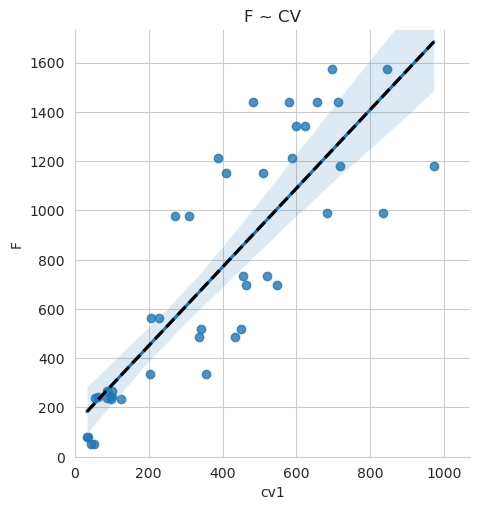

In [161]:
plot_F_cv(df_f_org, "1", title = "F ~ CV", add_xy_line=False)

<Figure size 1000x600 with 0 Axes>

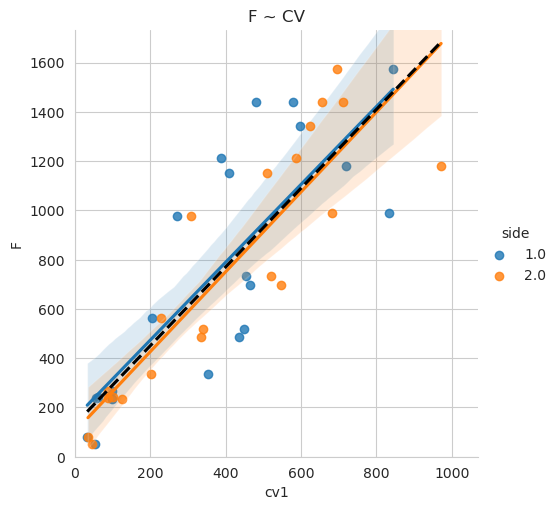

In [162]:
plot_F_cv(df_f_org, "1", title = "F ~ CV", add_xy_line=False, hue = "side")

<Figure size 1000x600 with 0 Axes>

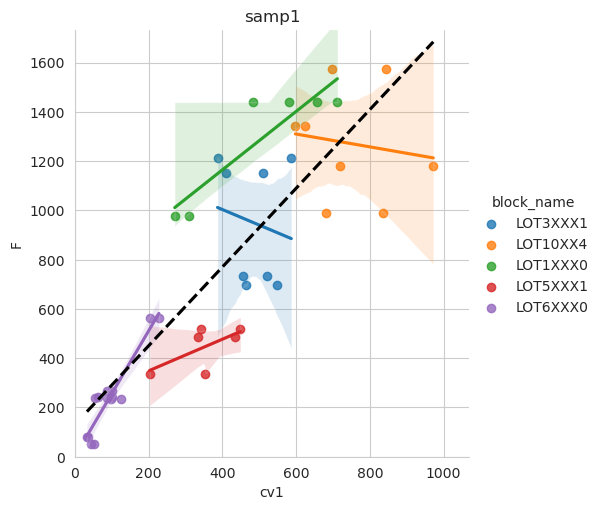

<Figure size 1000x600 with 0 Axes>

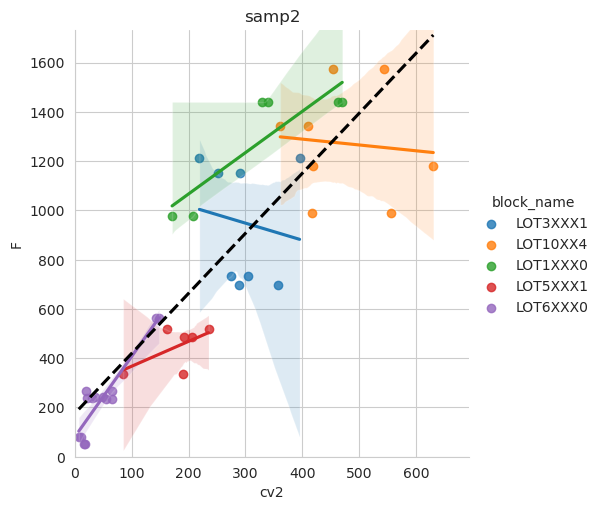

<Figure size 1000x600 with 0 Axes>

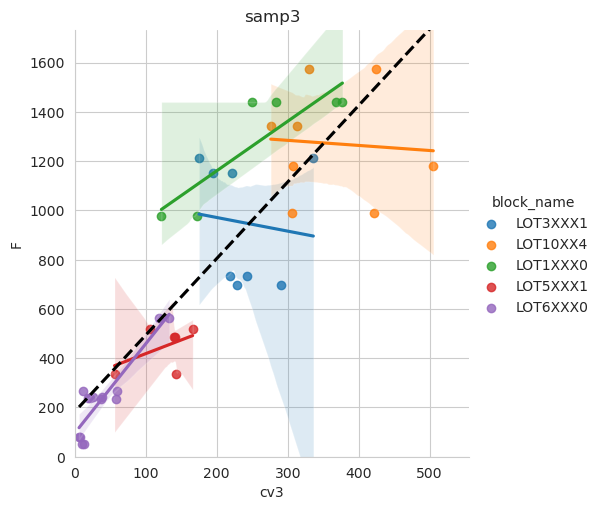

<Figure size 1000x600 with 0 Axes>

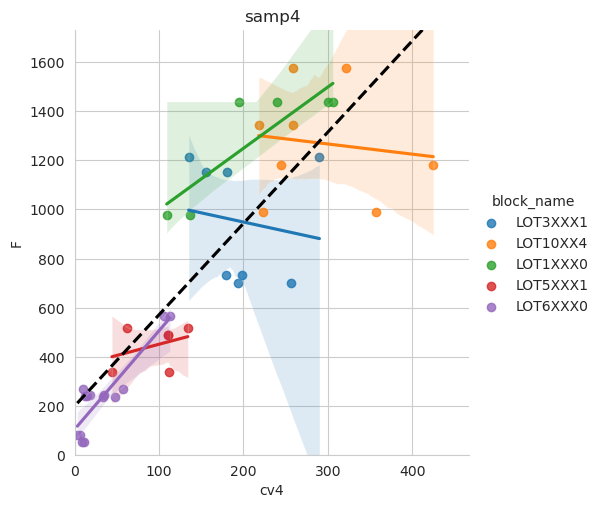

<Figure size 1000x600 with 0 Axes>

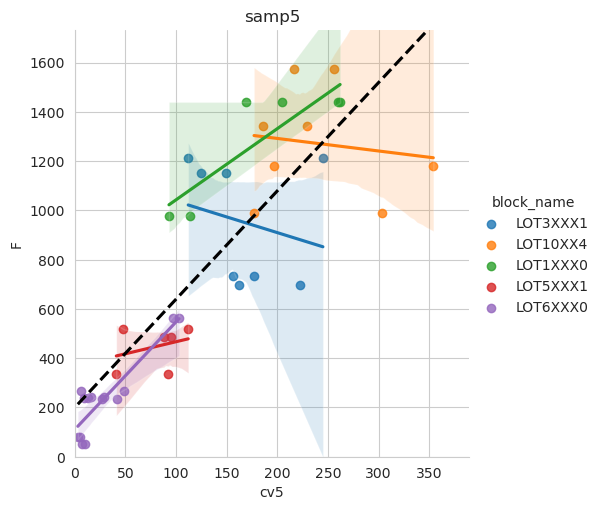

In [163]:
for i in range(1,6):
    plot_F_cv(df_f,i,"block_name", f"samp{i}")

<Figure size 1000x600 with 0 Axes>

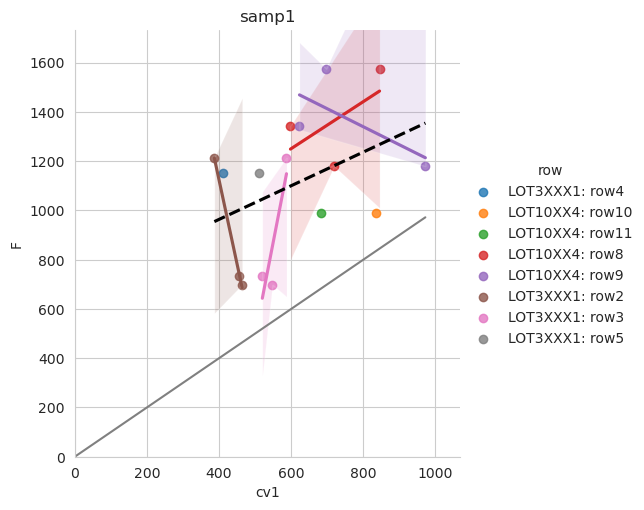

<Figure size 1000x600 with 0 Axes>

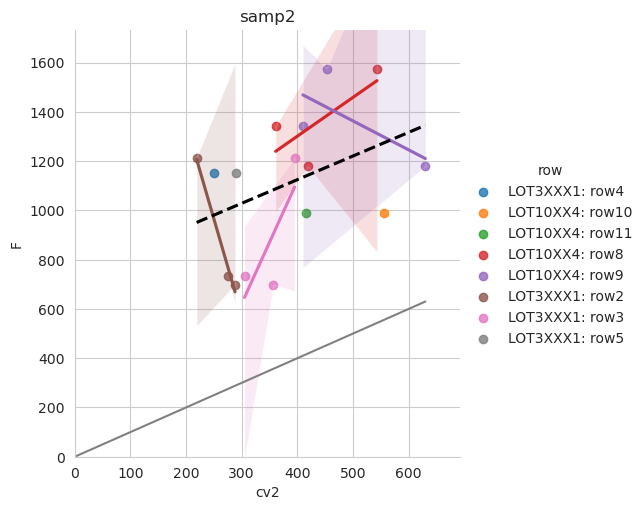

<Figure size 1000x600 with 0 Axes>

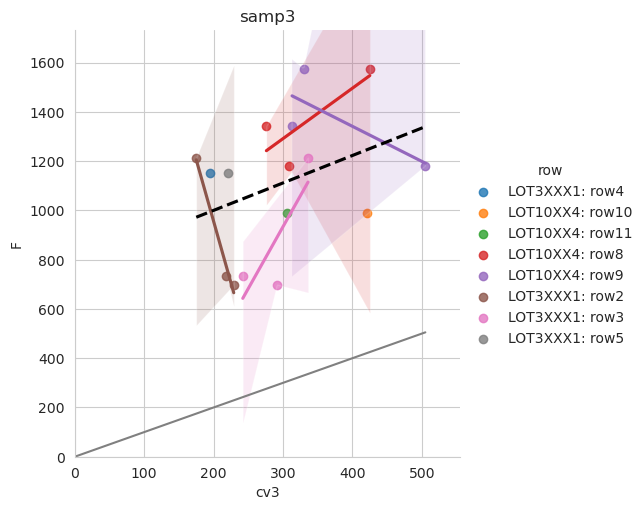

<Figure size 1000x600 with 0 Axes>

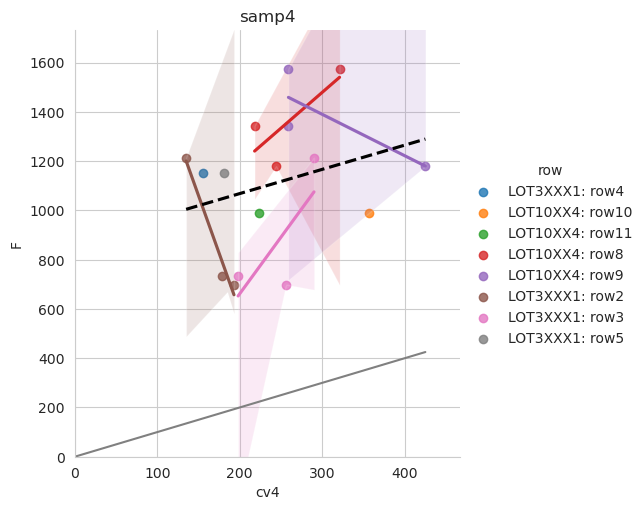

<Figure size 1000x600 with 0 Axes>

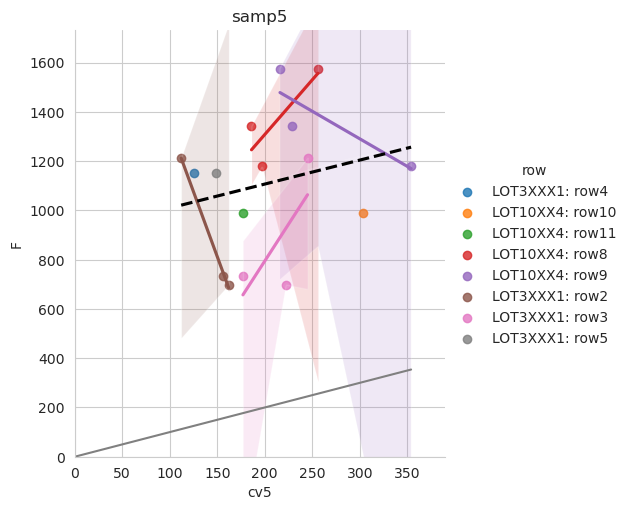

In [168]:
df_f["row"] = df_f.apply(lambda x: f'{x["block_name"]}: row{x["name"].split("_")[0][1:]}', axis = 1)

for i in range(1,6):
    plot_F_cv(df_f[np.isin(df_f["block_name"], ["LOT10XX4", "LOT3XXX1"])],i,"row", f"samp{i}")

### Modeling

In [169]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [175]:
df_f = df_f[~df_f["F"].isna()]
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: row{x["name"].split("_")[0][1:]}', axis = 1)
#filter
# df = df[df["speed"] == 4].reset_index()

groups = df["block_name"]

  
X = df[["cv1"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor(fit_intercept = False)
cross_validate_with_mean(model, X, y, groups=groups)
print(model.intercept_, model.coef_)

true: 3364.0,    pred: 2394.659597510764. (28.82 %) (LOT6XXX0)
true: 7600.0,    pred: 7024.943582950304. (7.57 %) (LOT3XXX1)
true: 10176.0,    pred: 11996.117927926898. (17.89 %) (LOT10XX4)
true: 2680.0,    pred: 3997.334052086325. (49.15 %) (LOT5XXX1)
true: 7712.0,    pred: 5113.011262793591. (33.70 %) (LOT1XXX0)
0.355914324249482 0.08174101117670392
0.0 [1.69811068]


In [174]:
df = df_f.reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: row{x["name"].split("_")[0][1:]}', axis = 1)

X = df[["cv1"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = True)
print(cross_validate_with_mean(model, X, y, groups=df["block_name"]))
# print(cross_validate_with_mean(model, X, y, groups=df["block_name"]))
model.fit(X,y)
print(model.intercept_, model.coef_)

true: 3364.0,    pred: 6152.890538252126. (82.90 %) (LOT6XXX0)
true: 7600.0,    pred: 7176.4243680037325. (5.57 %) (LOT3XXX1)
true: 10176.0,    pred: 11674.381791004922. (14.72 %) (LOT10XX4)
true: 2680.0,    pred: 4416.954712333717. (64.81 %) (LOT5XXX1)
true: 7712.0,    pred: 5176.932152564199. (32.87 %) (LOT1XXX0)
0.6811935312706174 0.6055666982893951
(0.40177100028702173, 0.2943150376933565)
130.3714163921909 [1.59884644]


In [176]:
df = df_f.reset_index(drop = True).copy()
# df = df_f[df_f["block_name"]!="FREDIANI"].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: row{x["name"].split("_")[0][1:]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor
for block in df["block_name"].unique():
    logic_vec = df["block_name"] == block
    X = df[logic_vec][["cv1"]].reset_index(drop = True)
    # X["cv2^2"] = X["cv2"]**2
    y = df[logic_vec]["F"].reset_index(drop = True)
    print("no intercept")
    model = LinearRegression(fit_intercept = False)
    print(cross_validate_with_mean(model, X, y, groups=df[logic_vec]["row"].reset_index(drop = True)))
    model.fit(X,y)
    print(model.coef_)
    print("with intercept")
    model = LinearRegression(fit_intercept = True)
    print(cross_validate_with_mean(model, X, y, groups=df[logic_vec]["row"].reset_index(drop = True)))
    model.fit(X,y)
    print(model.intercept_, model.coef_)

no intercept
true: 2647.0,    pred: 3621.5527696967874. (36.82 %) (LOT3XXX1: row3)
true: 2647.0,    pred: 2467.3154279989253. (6.79 %) (LOT3XXX1: row2)
true: 1153.0,    pred: 948.3051206822503. (17.75 %) (LOT3XXX1: row5)
true: 1153.0,    pred: 749.2786056128228. (35.01 %) (LOT3XXX1: row4)
0.31082058089621717 0.09704080369681116
(0.24093399451985414, 0.12458343243610226)
[1.91391982]
with intercept
true: 2647.0,    pred: 2414.203389830509. (8.79 %) (LOT3XXX1: row3)
true: 2647.0,    pred: 3146.558761816924. (18.87 %) (LOT3XXX1: row2)
true: 1153.0,    pred: 897.531999109528. (22.16 %) (LOT3XXX1: row5)
true: 1153.0,    pred: 931.7130531453362. (19.19 %) (LOT3XXX1: row4)
0.2456097070824123 0.051075094687525205
(0.17254114531970366, 0.05049099404944806)
1256.4644225308089 [-0.63172259]
no intercept
true: 4098.0,    pred: 3736.1336576347194. (8.83 %) (LOT10XX4: row9)
true: 4098.0,    pred: 3323.9715350623983. (18.89 %) (LOT10XX4: row8)
true: 990.0,    pred: 1144.906089529708. (15.65 %) (LOT10

In [64]:
df = df_f.reset_index(drop = True).copy()
# df = df_f[df_f["block_name"]!="FREDIANI"].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: {x["name"].split("_")[0]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor
for block in df["block_name"].unique():
    logic_vec = df["block_name"] == block
    X = df[logic_vec][["cv1"]].reset_index(drop = True)
    # X["cv2^2"] = X["cv2"]**2
    y = df[logic_vec]["F"].reset_index(drop = True)
    model = LinearRegression(fit_intercept=True)
    print(cross_validate_with_mean(model, X, y, groups=df[logic_vec]["row"].reset_index(drop = True)))
    model.fit(X,y)
    print(model.intercept_, model.coef_)

true: 7570.0,    pred: 8840.406442065409. (16.78 %) (BLOCKAT0: R4)
true: 5858.0,    pred: 6759.119532581351. (15.38 %) (BLOCKAT0: R7)
true: 5858.0,    pred: 5349.45047256018. (8.68 %) (BLOCKAT0: R6)
0.13703198945561793 0.03586453405889803
(0.13615372807387813, 0.035353941506307975)
2006.8390374077817 [0.81135792]
true: 4229.0,    pred: 3528.554864792371. (16.56 %) (G60CLEM0: R5)
true: 4229.0,    pred: 4148.149746464246. (1.91 %) (G60CLEM0: R4)
true: 2273.0,    pred: 2507.159518822312. (10.30 %) (G60CLEM0: R12)
true: 2273.0,    pred: 2590.8542992005505. (13.98 %) (G60CLEM0: R11)
0.13304621447718853 0.017533425824768696
(0.10690100353092728, 0.05535075489514646)
1131.1359674589614 [0.96888399]


In [ ]:
model.int

In [ ]:
tangos = ["OLIVER55", "BLOCK700"]
clem = ["BLAYNEY0", "FREDIANI", "MAZMANI2"]

# Tango

In [ ]:
df = df_f[df_f["block_name"].isin(tangos)].reset_index(drop = True).copy()
plot_F_cv(df,1,"block_name", f"samp{1}")
# df = df_f[df_f["block_name"]!="FREDIANI"].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: {x["name"].split("_")[0]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv1"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
print(cross_validate_with_mean(model, X, y, groups=df["row"]))
print(cross_validate_with_mean(model, X, y, groups=df["block_name"]))
model.fit(X,y)
model.coef_

# clem

In [ ]:
df = df_f[df_f["block_name"].isin(clem)].reset_index(drop = True).copy()
plot_F_cv(df,1,"block_name", f"samp{1}")
# df = df_f[df_f["block_name"]!="FREDIANI"].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block_name"]}: {x["name"].split("_")[0]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv1"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
print(cross_validate_with_mean(model, X, y, groups=df["row"]))
print(cross_validate_with_mean(model, X, y, groups=df["block_name"]))
model.fit(X,y)
model.coef_

## V -shape

In [ ]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[~df["F_V"].isna()]
#filter
df = df[df["depth_filter"] == 5].reset_index(drop = True)
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]

  
X = df[["cv3"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F_V"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=groups, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=groups)

In [ ]:
cv_cols = [f"cv{i}" for i in range(1,4)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df[cv_F_col] = df[cv_col]/df["F"]

    display(df.groupby("speed")[cv_F_cols].mean())
display(df.groupby(["speed", "block"])[cv_F_cols].mean())
display(df.groupby("side")[cv_F_cols].mean())

In [ ]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[~df["F_V"].isna()]#filter
df = df[df["depth_filter"] == 5].reset_index()
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]
  
X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F_V"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=None, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=None)

In [ ]:
cv_cols = [f"cv{i}" for i in range(1,4)]
cv_F_cols = [f"{col}/F_V" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df[cv_F_col] = df[cv_col]/df["F_V"]

display(df[cv_F_cols].mean())
display(df.groupby("speed")[cv_F_cols].mean())
display(df.groupby(["speed", "block"])[cv_F_cols].mean())
display(df.groupby("side")[cv_F_cols].mean())

## combining A+B results

need to map section to block

In [ ]:
df_comb = df_f_org.groupby(["section", "speed"]).mean()
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_comb[cv_F_col] = df_comb[cv_col]/df_comb["F"]
df_comb

In [ ]:
sections = [i[0] for i in df_comb.index]

In [ ]:
def sec_to_block(section):
    if section<=5:
        return "HC-2"
    if section<=10 or (section>=25 and section<=29):
        return "GL-2"
    if section<=15:
        return "HC-1"
    return "GL-1"
blocks = [sec_to_block(sec) for sec in sections]
df_comb["block"] = blocks

In [ ]:
df = df_comb.reset_index()
#filter
# df = df[df["speed"] == 4].reset_index()
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]

  
X = df[["cv2", "cv3"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=groups, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=groups)